# Project on Customer Segmentation

In [1]:
#Hello Everyone
#This is Umang!
# I am going to explore this Customer Data from Kaggle and provide an overview
#of customer segmentation as a part of my Task in Internship with Happieloop

In [2]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Understanding our Data

In [3]:
#Importing Customer data, that we uploaded in our jupiter 
#notebook from Kaggle 
customer = pd.read_csv(r"C:\Users\umang\Desktop\customer_data.csv")

In [4]:
customer

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [5]:
customer.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [6]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [7]:
customer.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [8]:
for col in customer.select_dtypes(include=['object']).columns:
    print(f'{col}: {customer[col].unique()}')

Gender: ['Male' 'Female']
Ever_Married: ['No' 'Yes' nan]
Graduated: ['No' 'Yes' nan]
Profession: ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
Spending_Score: ['Low' 'Average' 'High']
Var_1: ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']
Segmentation: ['D' 'A' 'B' 'C']


# Cleaning the Data

In [9]:
customer.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [10]:
 # drops nulls values
customer.dropna(axis=0 , inplace=True)

In [11]:
# drop duplicated data 
customer.drop_duplicates(inplace = True)

In [12]:
# changing type of family size and work experience
customer['Family_Size'] = customer['Family_Size'].astype(int)
customer['Work_Experience'] = customer['Work_Experience'].astype(int)

# Visualization

Text(0.5, 1.0, 'Countplot of Gender')

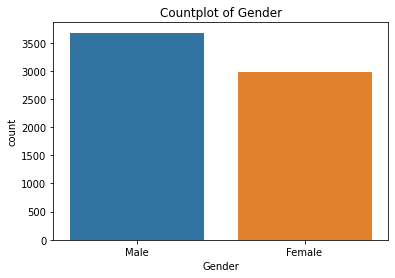

In [13]:
# Gender wise distribution of our data
sns.countplot(data=customer,x='Gender')
plt.title('Countplot of Gender')

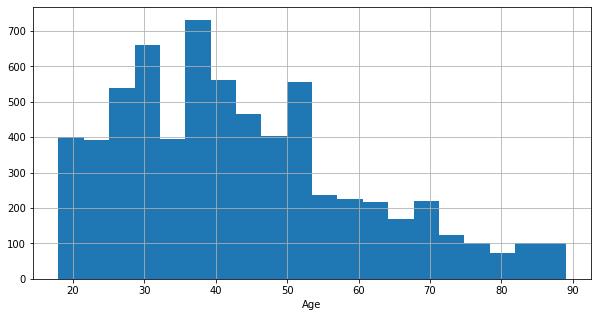

In [14]:
#Different Age Counts
plt.figure(figsize=(10,5))
customer['Age'].hist(bins=20)
plt.xlabel('Age')
plt.show()

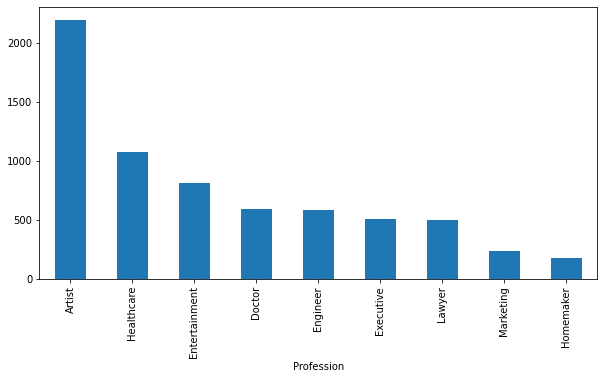

In [15]:
#Different Profession Counts
plt.figure(figsize=(10,5))
customer['Profession'].value_counts().plot(kind='bar')
plt.xlabel('Profession')
plt.show()

# Encoding the Categorical Variables

In [16]:
# getting just categorical columns
customer_new = customer[['Gender','Ever_Married','Graduated','Profession',
                         'Spending_Score','Segmentation']]

In [17]:
customer_new

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Segmentation
0,Male,No,No,Healthcare,Low,D
2,Female,Yes,Yes,Engineer,Low,B
3,Male,Yes,Yes,Lawyer,High,B
5,Male,Yes,No,Artist,Average,C
6,Male,No,Yes,Healthcare,Low,C
...,...,...,...,...,...,...
8062,Male,Yes,Yes,Artist,High,B
8064,Male,No,No,Executive,Low,D
8065,Female,No,Yes,Healthcare,Low,D
8066,Female,No,Yes,Healthcare,Low,B


In [18]:
customer

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1,Low,4,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1,Low,1,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0,High,2,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0,Average,2,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1,Low,3,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0,High,5,Cat_6,B
8064,464685,Male,No,35,No,Executive,3,Low,4,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1,Low,1,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1,Low,4,Cat_6,B


In [19]:
#Assigning values to categorical variables
#print all unique values that are in categorical features
for col in customer.select_dtypes(include=['object']).columns:
    print(f'{col}: {customer[col].unique()}')

Gender: ['Male' 'Female']
Ever_Married: ['No' 'Yes']
Graduated: ['No' 'Yes']
Profession: ['Healthcare' 'Engineer' 'Lawyer' 'Artist' 'Doctor' 'Homemaker'
 'Entertainment' 'Marketing' 'Executive']
Spending_Score: ['Low' 'High' 'Average']
Var_1: ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' 'Cat_5']
Segmentation: ['D' 'B' 'C' 'A']


In [20]:
#encoded all values by labelencoder
from sklearn import preprocessing
for col in customer.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(customer[col].unique())
    customer[col] = label_encoder.transform(customer[col])
    print(f'{col} : {customer[col].unique()}')

Gender : [1 0]
Ever_Married : [0 1]
Graduated : [0 1]
Profession : [5 2 7 0 1 6 3 8 4]
Spending_Score : [2 1 0]
Var_1 : [3 5 6 2 0 1 4]
Segmentation : [3 1 2 0]


In [21]:
customer

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1,2,4,3,3
2,466315,0,1,67,1,2,1,2,1,5,1
3,461735,1,1,67,1,7,0,1,2,5,1
5,461319,1,1,56,0,0,0,0,2,5,2
6,460156,1,0,32,1,5,1,2,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,1,1,41,1,0,0,1,5,5,1
8064,464685,1,0,35,0,4,3,2,4,3,3
8065,465406,0,0,33,1,5,1,2,1,5,3
8066,467299,0,0,27,1,5,1,2,4,5,1


# Customer Segmentation by K means

In [22]:
# we will analyse the customer base based on gender, age group, education 
# status, profession and spending score

In [23]:
customer_scaled = normalize(customer)

In [24]:
customer_scaled = pd.DataFrame(customer_scaled, columns = customer.columns)

In [25]:
customer_scaled

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1.0,0.000002,0.000000,0.000048,0.000000,0.000011,0.000002,0.000004,0.000009,0.000006,0.000006
1,1.0,0.000000,0.000002,0.000144,0.000002,0.000004,0.000002,0.000004,0.000002,0.000011,0.000002
2,1.0,0.000002,0.000002,0.000145,0.000002,0.000015,0.000000,0.000002,0.000004,0.000011,0.000002
3,1.0,0.000002,0.000002,0.000121,0.000000,0.000000,0.000000,0.000000,0.000004,0.000011,0.000004
4,1.0,0.000002,0.000000,0.000070,0.000002,0.000011,0.000002,0.000004,0.000007,0.000011,0.000004
...,...,...,...,...,...,...,...,...,...,...,...
6660,1.0,0.000002,0.000002,0.000089,0.000002,0.000000,0.000000,0.000002,0.000011,0.000011,0.000002
6661,1.0,0.000002,0.000000,0.000075,0.000000,0.000009,0.000006,0.000004,0.000009,0.000006,0.000006
6662,1.0,0.000000,0.000000,0.000071,0.000002,0.000011,0.000002,0.000004,0.000002,0.000011,0.000006
6663,1.0,0.000000,0.000000,0.000058,0.000002,0.000011,0.000002,0.000004,0.000009,0.000011,0.000002


In [26]:
# Choosing the number of clusters by Within Clusters Sum of Squares (WCSS)
wss = []
for i in range(1,10):
    from sklearn.cluster import KMeans
    k_means = KMeans( n_clusters = i)
    k_means.fit(customer_scaled)
    wss.append(k_means.inertia_)

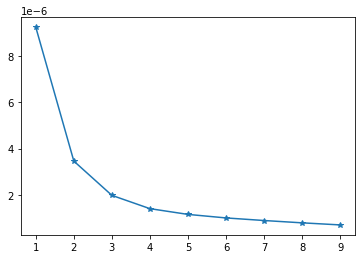

In [27]:
# ploting Elbow curve for determination of the number of clusters
plt.plot([1,2,3,4,5,6,7,8,9], wss, marker = '*')
plt.xlabel = 'number of k values'
plt.ylabel = 'WSS'
plt.show()

In [28]:
# so the number of clusters will be 4 as after 4 there is no further 
#significant decrease in the wss value

In [29]:
k_means = KMeans(n_clusters=4)
k_means.fit(customer_scaled)

KMeans(n_clusters=4)

In [30]:
identified_clusters = k_means.fit_predict(customer_scaled)
customer['Cluster_int']= identified_clusters

In [31]:
k_means.inertia_

1.4062172138467514e-06

In [32]:
customer.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Cluster_int
0,462809,1,0,22,0,5,1,2,4,3,3,1
2,466315,0,1,67,1,2,1,2,1,5,1,0
3,461735,1,1,67,1,7,0,1,2,5,1,0
5,461319,1,1,56,0,0,0,0,2,5,2,3
6,460156,1,0,32,1,5,1,2,3,5,2,1


In [33]:
print(k_means.cluster_centers_)

[[9.99999987e-01 1.24473717e-06 2.06397586e-06 1.60901981e-04
  1.40456783e-06 1.00311665e-05 2.56335012e-06 2.72043218e-06
  4.43297189e-06 9.99816363e-06 2.86829876e-06]
 [9.99999998e-01 1.17591055e-06 3.74962215e-07 5.69181750e-05
  8.08389581e-07 7.94969563e-06 6.46798223e-06 3.93597428e-06
  7.56493865e-06 8.45932026e-06 4.48065973e-06]
 [9.99999996e-01 1.11842441e-06 1.38563031e-06 8.56784905e-05
  1.65899246e-06 3.65139455e-06 7.47277559e-06 2.64318595e-06
  5.47282049e-06 8.93586306e-06 2.63482043e-06]
 [9.99999993e-01 1.27052154e-06 1.87918981e-06 1.16129100e-04
  1.73331167e-06 3.57421940e-06 4.03705757e-06 2.04080526e-06
  6.02311003e-06 9.30332332e-06 2.96911856e-06]]


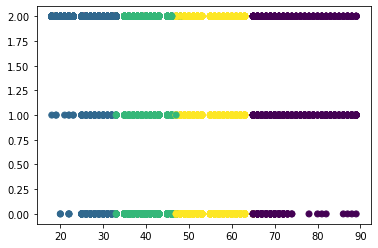

In [34]:
plt.scatter(customer['Age'], customer['Spending_Score'], c = 
            customer['Cluster_int'])
plt.show()

# Documentation

In [35]:
# This dataset shows the customer's age, gender, marital status,
#education status, profession, their work experience, their spending
#score, family size, and the segment they belong to

In [36]:
# we conclude the following:
# 1. Our customer database has almost equal contribution of male and 
#female customers
# 2. Our major customers include from the age 25 to 50
# 3. Majority of our data set is graduated
# 4. We notice that after the age of 65 is in our fourth cluster, we 
#have half the customers with low spending rate and half with high 
#spending rate
# 5. We also notice that customers of age 30 and below have mostly low
#spending rate